# Gene expression

**Import**

In [1]:
# from second tutorial notebook (Part02)
import scanpy as sc
import pandas as pd
import scvelo as scv
import numpy as np
import seaborn as sns
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import sklearn
import ipywidgets as widgets

# others
import re
import os

# first tutorial
import diffxpy.api as dxpy
import plotly.express as px

In [2]:
adata_input = '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/BON/cluster_adata.h5ad'

In [3]:
adata = sc.read(adata_input)

In [4]:
#open human lncRNA txt file
HUM_lncRNAs = []
f = open('/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/data/mapping/annotation_starsolo/lncRNAs.txt', "r")
for line in f:
    l = line.strip('\n')
    HUM_lncRNAs.append(l)
f.close()

In [5]:
#open chimp lncRNA txt file
CHIMP_lncRNAs = []
f = open('/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/data/mapping_own_ref/BON/annotation_starsolo/CHIMP_lncRNAs.txt', "r")
for line in f:
    l = line.strip('\n')
    CHIMP_lncRNAs.append(l)
f.close()

In [6]:
adata

AnnData object with n_obs × n_vars = 5043 × 25535
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'Undif. SG_score', 'Dif. SG_score', 'Lept. SC_score', 'Zyg. SC_score', 'Pach.Dipl. SC_score', 'Early round SD_score', 'Late round SD_score', 'Elong SD_score', 'SC_score', 'SC.I_score', 'SC.II_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DATASET_colors', 'DE_leiden', 'DE_leiden_celltype', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.2_colors', 'leiden_R.3_colors', 'neighbors', 'pca', 'spermatogenesis_

In [7]:
category_order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli']

In [8]:
palette_dict = {"Undif. SG":'lightblue',"Dif. SG":'blue',"SC.I":'lightgreen','SC.II':'green','Early round SD':'yellow','Late round SD':'orange','Elong. SD':'red','Sertoli':'pink','Macrophage':'brown'}

In [9]:
fig = px.histogram(adata.obs['spermatogenesis_types'], x='spermatogenesis_types', color='spermatogenesis_types',color_discrete_map=palette_dict)
fig.update_layout(
    xaxis=dict(
        categoryorder='array',
        categoryarray=category_order
    ),
    autosize=False,
    width=800,
    bargap=0.1,
    bargroupgap=0.1
)
fig.show()


In [10]:
fig = px.box(adata.obs, x='spermatogenesis_types', y='total_counts', color='spermatogenesis_types', color_discrete_map=palette_dict)
fig.update_layout(
    xaxis=dict(
        categoryorder='array',
        categoryarray=category_order
    ),
    autosize=False,
    width=500,
)
fig.show()

In [11]:
# LINC genes, True/False vector
LINC = ['LINC' in i for i in adata.var_names] 

In [12]:
LINC_genes = adata[:,LINC].var_names

In [13]:
LINC_genes

Index(['LINC01409', 'LINC00115', 'LINC01128', 'LINC01786', 'LINC01134',
       'LINC01346', 'LINC01345', 'LINC02780', 'LINC01777', 'LINC02781',
       ...
       'LINC01284', 'LINC01278', 'LINC00630', 'LINC01285', 'LINC00629',
       'LINC00632', 'LINC00893', 'LINC00850', 'LINC00894', 'LINC00278'],
      dtype='object', length=1405)

1405 LINC genes in total are expressed

In [14]:
#LINC genes annotated in MAC
for gene in CHIMP_lncRNAs:
    if 'LINC' in gene:
        print(gene)

LINC01750


In [15]:
shared_lnc = []
for gene in HUM_lncRNAs:
        if gene in adata.var_names:
            shared_lnc.append(gene)
len(shared_lnc)

9071

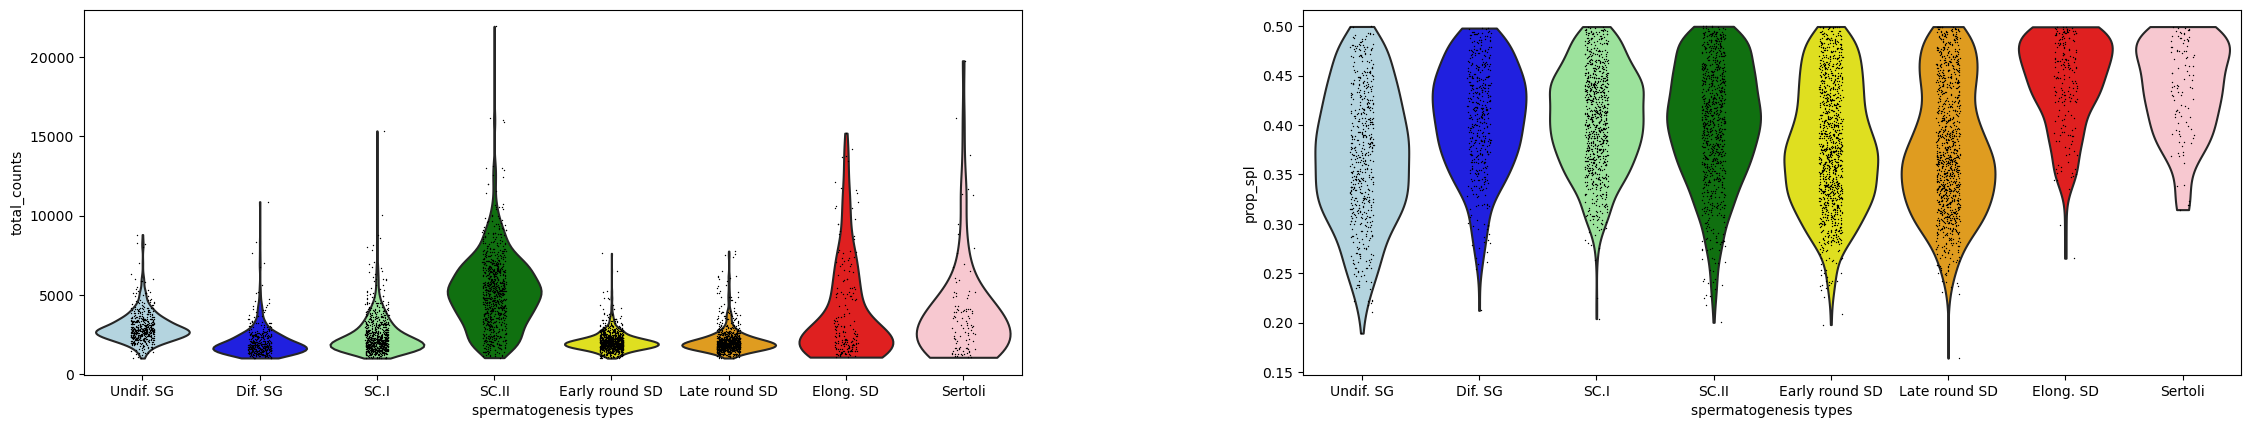

In [16]:
with rc_context({'figure.figsize': (10, 5)}):
    sc.pl.violin(adata, ['total_counts', 'prop_spl'], groupby='spermatogenesis_types', order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli'])

In [17]:
adata

AnnData object with n_obs × n_vars = 5043 × 25535
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'Undif. SG_score', 'Dif. SG_score', 'Lept. SC_score', 'Zyg. SC_score', 'Pach.Dipl. SC_score', 'Early round SD_score', 'Late round SD_score', 'Elong SD_score', 'SC_score', 'SC.I_score', 'SC.II_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DATASET_colors', 'DE_leiden', 'DE_leiden_celltype', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.2_colors', 'leiden_R.3_colors', 'neighbors', 'pca', 'spermatogenesis_

In [18]:
adata.uns['DE_leiden_celltype']['names']

array([('amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/12F/12G/12H/12J', 'LOC105372004', 'CCDC168', 'LOC440896', 'MALAT1', 'C1QTNF3', 'ZBTB20', 'amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/12F/12G/12H/12J'),
       ('RPS2', 'SPAG16', 'LINC01000', 'LINC00917', 'ZCWPW1', 'ANKRD62', 'CARMIL1', 'PARD3'),
       ('LOC100507336', 'NPIPB15', 'PRM1', 'EML2-AS1', 'SMC1B', 'DPY19L2', 'ERBB4', 'amplicon-chrX-PAGE2/2B/5'),
       ('amplicon-chrX-RHOXF2/B', 'LOC101929894', 'TNP1', 'AFG1L', 'DMRTC2', 'ANKRD20A1', 'COL1A2', 'HMGB1'),
       ('JMJD1C', 'TTC29', 'PRM2', 'CTNNA3', 'HORMAD1', 'LOC105379102', 'NFIA', 'NRG3'),
       ('UBE2E2', 'LRRIQ1', 'LINC00266-3', 'PLCZ1', 'RAD51AP2', 'FAM153A', 'MIR202HG', 'MEF2C-AS1'),
       ('RPL10A', 'MAPK10', 'FAM229A', 'CCSER1', 'MIR4713HG', 'ANKRD36B', 'PLXDC2', 'CALN1'),
       ('SMC1B', 'NLRP1', 'LOC401357', 'LRRTM3', 'LOC105373554', 'ANKRD36C', 'TBX22', 'MTUS2'),
       ('AUTS2', 'PACRG', 'TMEM191B', 'STXBP5-AS1', 'SPDYA', 'RFX4', 'MIR99AHG', 'EEF1B2'),
   

In [19]:
top50 = pd.DataFrame(adata.uns['DE_leiden_celltype']['names']) # top 5 ranked genes for each cluster

top50.head()

Dif. SG Early round SD  \
0  amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/1...   LOC105372004   
1                                               RPS2         SPAG16   
2                                       LOC100507336        NPIPB15   
3                             amplicon-chrX-RHOXF2/B   LOC101929894   
4                                             JMJD1C          TTC29   

   Elong. SD Late round SD     SC.I         SC.II  Sertoli  \
0    CCDC168     LOC440896   MALAT1       C1QTNF3   ZBTB20   
1  LINC01000     LINC00917   ZCWPW1       ANKRD62  CARMIL1   
2       PRM1      EML2-AS1    SMC1B       DPY19L2    ERBB4   
3       TNP1         AFG1L   DMRTC2     ANKRD20A1   COL1A2   
4       PRM2        CTNNA3  HORMAD1  LOC105379102     NFIA   

                                           Undif. SG  
0  amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/1...  
1                                              PARD3  
2                           amplicon-chrX-PAGE2/2B/5  
3                                              HMGB1  
4                                               NRG3

In [20]:
# all lncRNA genes in the top 50 genes from DEA
top50_lnc = {'Undif. SG':[],'Dif. SG':[],'SC.I':[],'SC.II':[],'Early round SD':[],'Late round SD':[],'Elong. SD':[],'Sertoli':[]}

for celltype, genes in top50.items():
    for gene in genes:
        if gene in HUM_lncRNAs:
            top50_lnc[celltype].append(gene)

In [21]:
top50_lnc

{'Undif. SG': ['MEF2C-AS1',
  'SNHG15',
  'LOC107986770',
  'LOC100507412',
  'LOC105371004',
  'LOC105377171'],
 'Dif. SG': ['LOC100507336',
  'LINC02645',
  'LOC100507412',
  'ZBTB46-AS1',
  'TMX2-CTNND1'],
 'SC.I': ['MALAT1',
  'MIR4713HG',
  'LOC105373554',
  'LINC01794',
  'LINC01572',
  'LOC100507412',
  'ACTR3-AS1',
  'ZBTB46-AS1',
  'LOC105372687',
  'LOC105374308',
  'MSH5-SAPCD1'],
 'SC.II': ['LOC105379102',
  'LINC01507',
  'ANKRD20A4-ANKRD20A20P',
  'LINC02475',
  'LINC01106',
  'LOC100506207',
  'LINC01123',
  'LINC00342',
  'LINC01206',
  'STEAP2-AS1',
  'ADD3-AS1',
  'SPATA8',
  'STAG3L5P-PVRIG2P-PILRB',
  'AP4B1-AS1',
  'LOC101928030',
  'GIHCG',
  'LOC105376107'],
 'Early round SD': ['LOC105372004',
  'LOC101929894',
  'LOC105377110',
  'LOC101929492',
  'LOC112268205',
  'ZNF474-AS1',
  'LOC105370300',
  'CASC2'],
 'Late round SD': ['LOC440896',
  'LINC00917',
  'EML2-AS1',
  'STXBP5-AS1',
  'LOC101929058',
  'LOC105375971',
  'LOC105377872',
  'LOC112268205',
  'LOC1

In [22]:
lnc_count = {}

for celltype, genes in top50_lnc.items():
    lnc_count[celltype]=len(genes)

In [23]:
lnc_count

{'Undif. SG': 6,
 'Dif. SG': 5,
 'SC.I': 11,
 'SC.II': 17,
 'Early round SD': 8,
 'Late round SD': 19,
 'Elong. SD': 15,
 'Sertoli': 7}

In [24]:
# lncRNA genes in species own annotation
chimp_top50_lnc = {'Undif. SG':[],'Dif. SG':[],'SC.I':[],'SC.II':[],'Early round SD':[],'Late round SD':[],'Elong. SD':[],'Sertoli':[]}
            
for celltype,genes in top50_lnc.items():
    print(celltype)
    for gene in genes:
        if gene in CHIMP_lncRNAs:
            print(gene)
            chimp_top50_lnc[celltype].append(gene)
            
# TTTY14 from sertoli is in the species own annotation

Undif. SG
Dif. SG
SC.I
SC.II
Early round SD
Late round SD
Elong. SD
Sertoli
TTTY14


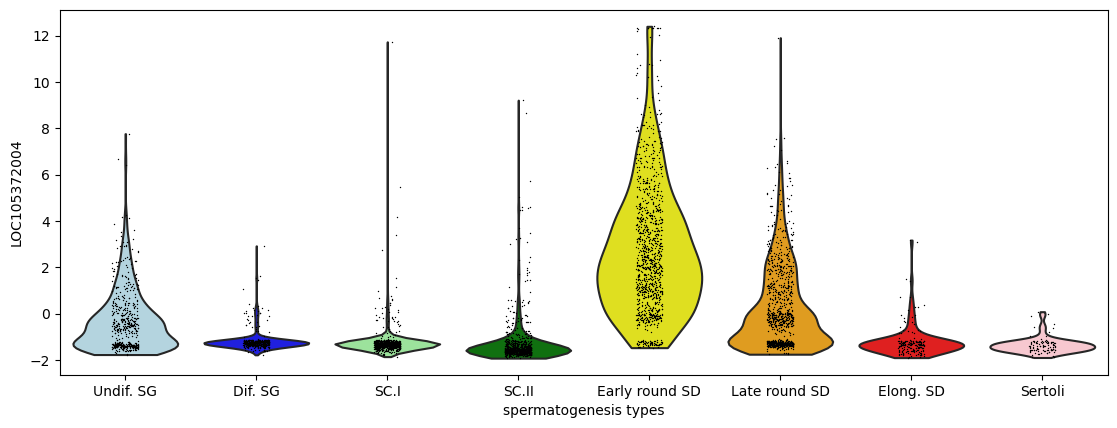

In [25]:
# to compare to a certain gene across groups
# no. 4 in SC.II
with rc_context({'figure.figsize': (11, 5)}):
    sc.pl.violin(adata, ['LOC105372004'], groupby='spermatogenesis_types', order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli'])

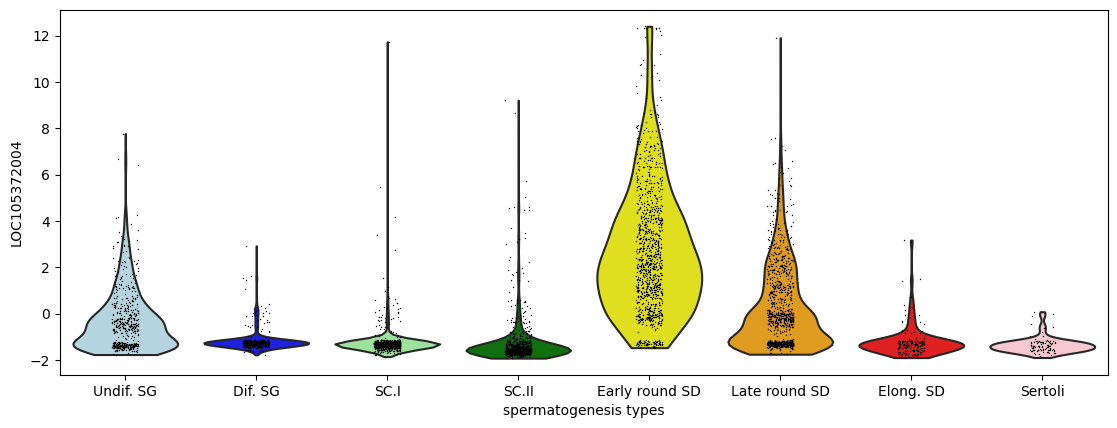

In [28]:
# raw counts are discrete
# to compare to a certain gene across groups
# no. 1 in early round
with rc_context({'figure.figsize': (11, 5)}):
    sc.pl.violin(adata, ['LOC105372004'], groupby='spermatogenesis_types', order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli'])

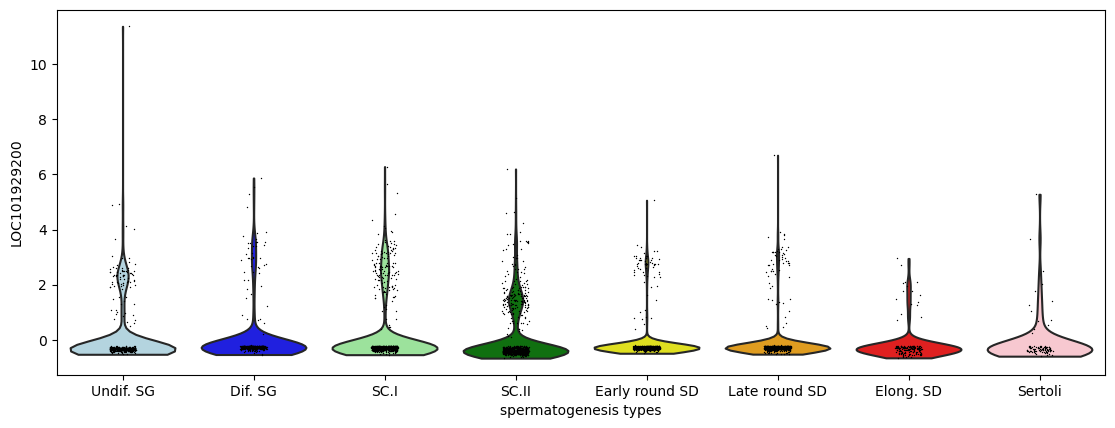

In [29]:
# no. 1 in sertoli
with rc_context({'figure.figsize': (11, 5)}):
    sc.pl.violin(adata, ['LOC101929200'], groupby='spermatogenesis_types', order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli'])

In [48]:
to_plot = []
to_plot = [top50_lnc[celltype][0] for celltype in top50_lnc]

In [49]:
to_plot

['MEF2C-AS1',
 'LOC100507336',
 'MALAT1',
 'LOC105379102',
 'LOC105372004',
 'LOC440896',
 'LINC01000',
 'MIR202HG']

In [32]:
to_plot[2]='MIR4713HG'

In [51]:
adata.X = adata.layers['norm_sct'].copy() 

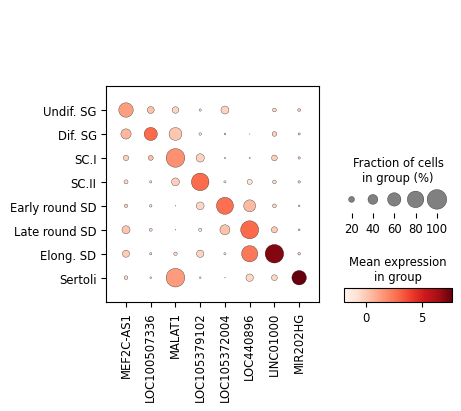

In [52]:
sc.pl.dotplot(adata, to_plot, groupby='spermatogenesis_types', categories_order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli'])

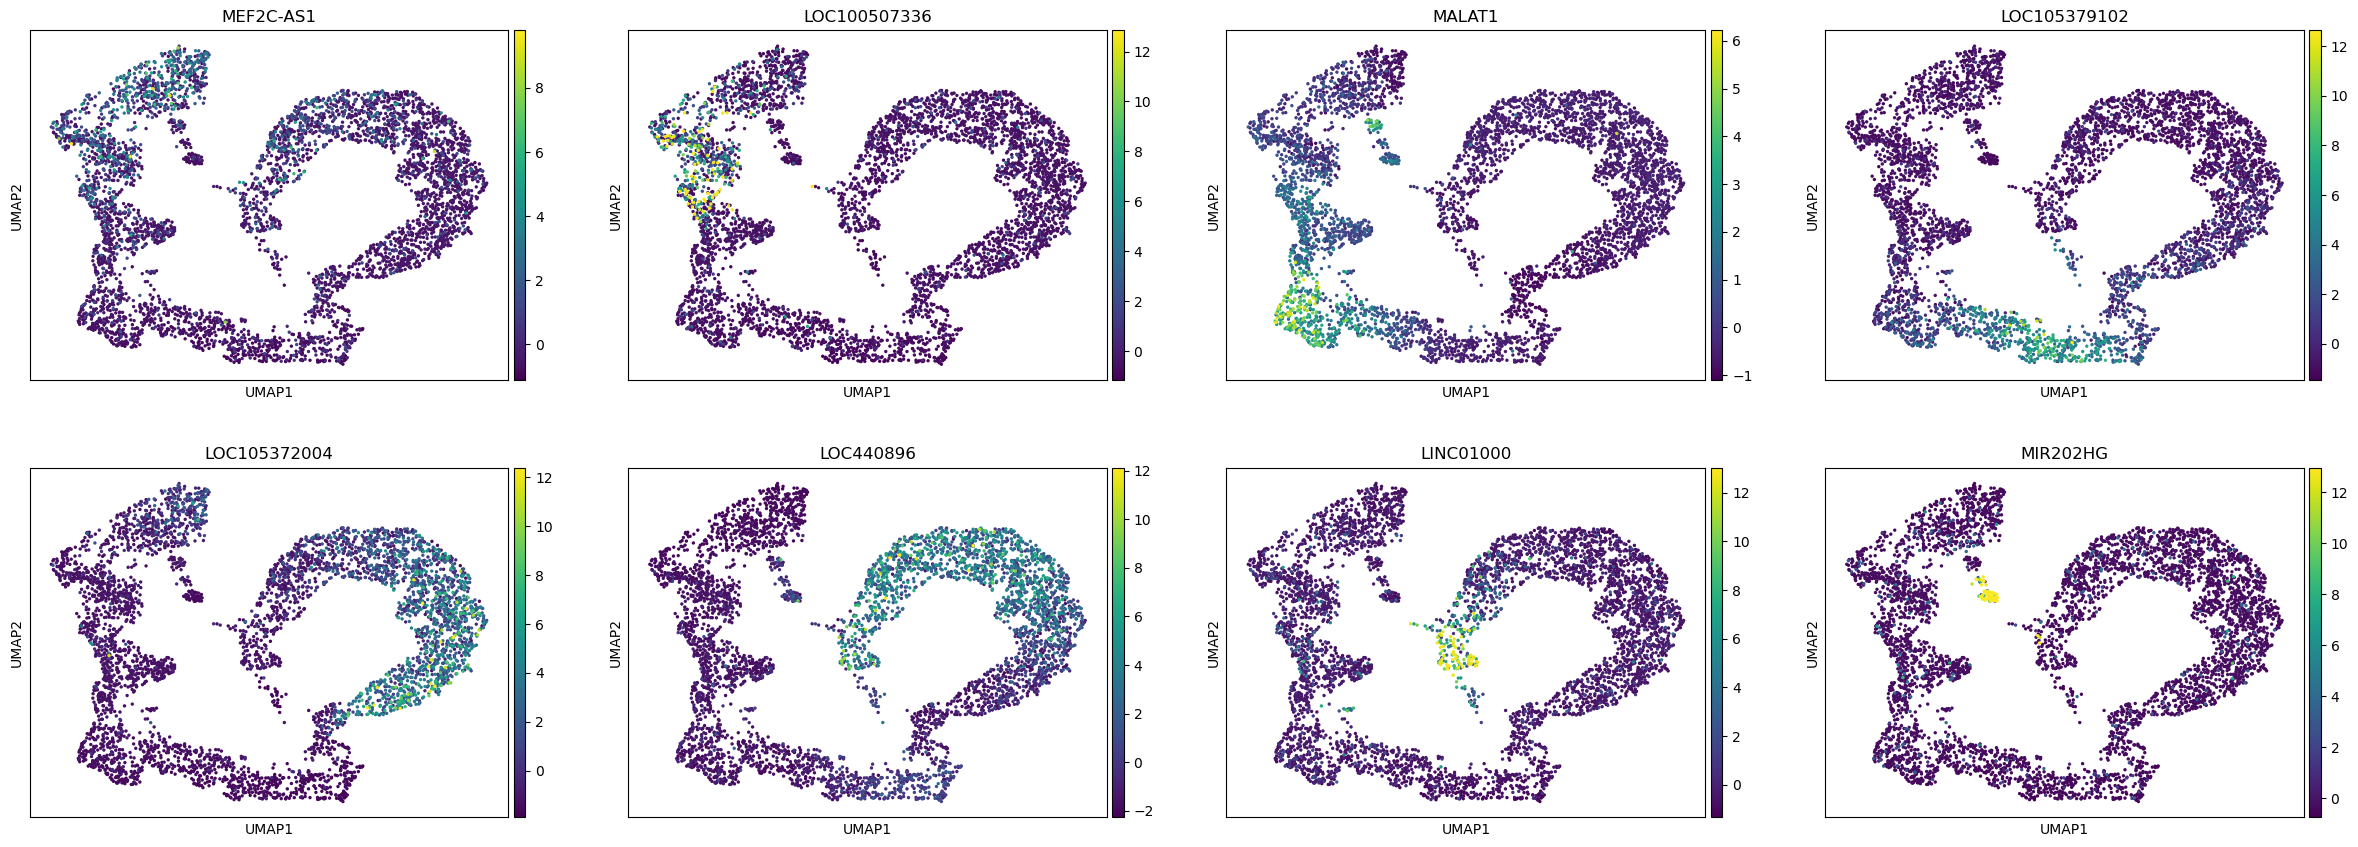

In [39]:
# UMAP colored by the top genes
# None of them in the species own annotation
sc.plotting.umap(adata, color=['MEF2C-AS1','LOC100507336','MALAT1','LOC105379102','LOC105372004','LOC440896','LINC01000','MIR202HG'])

In [47]:
adata.X = adata.layers['raw_counts'].copy() 

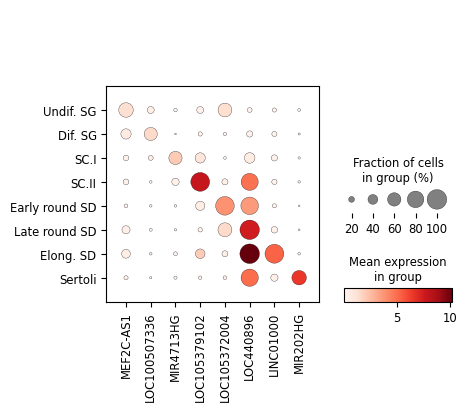

In [43]:
# raw counts
sc.pl.dotplot(adata, to_plot, groupby='spermatogenesis_types', categories_order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli'])

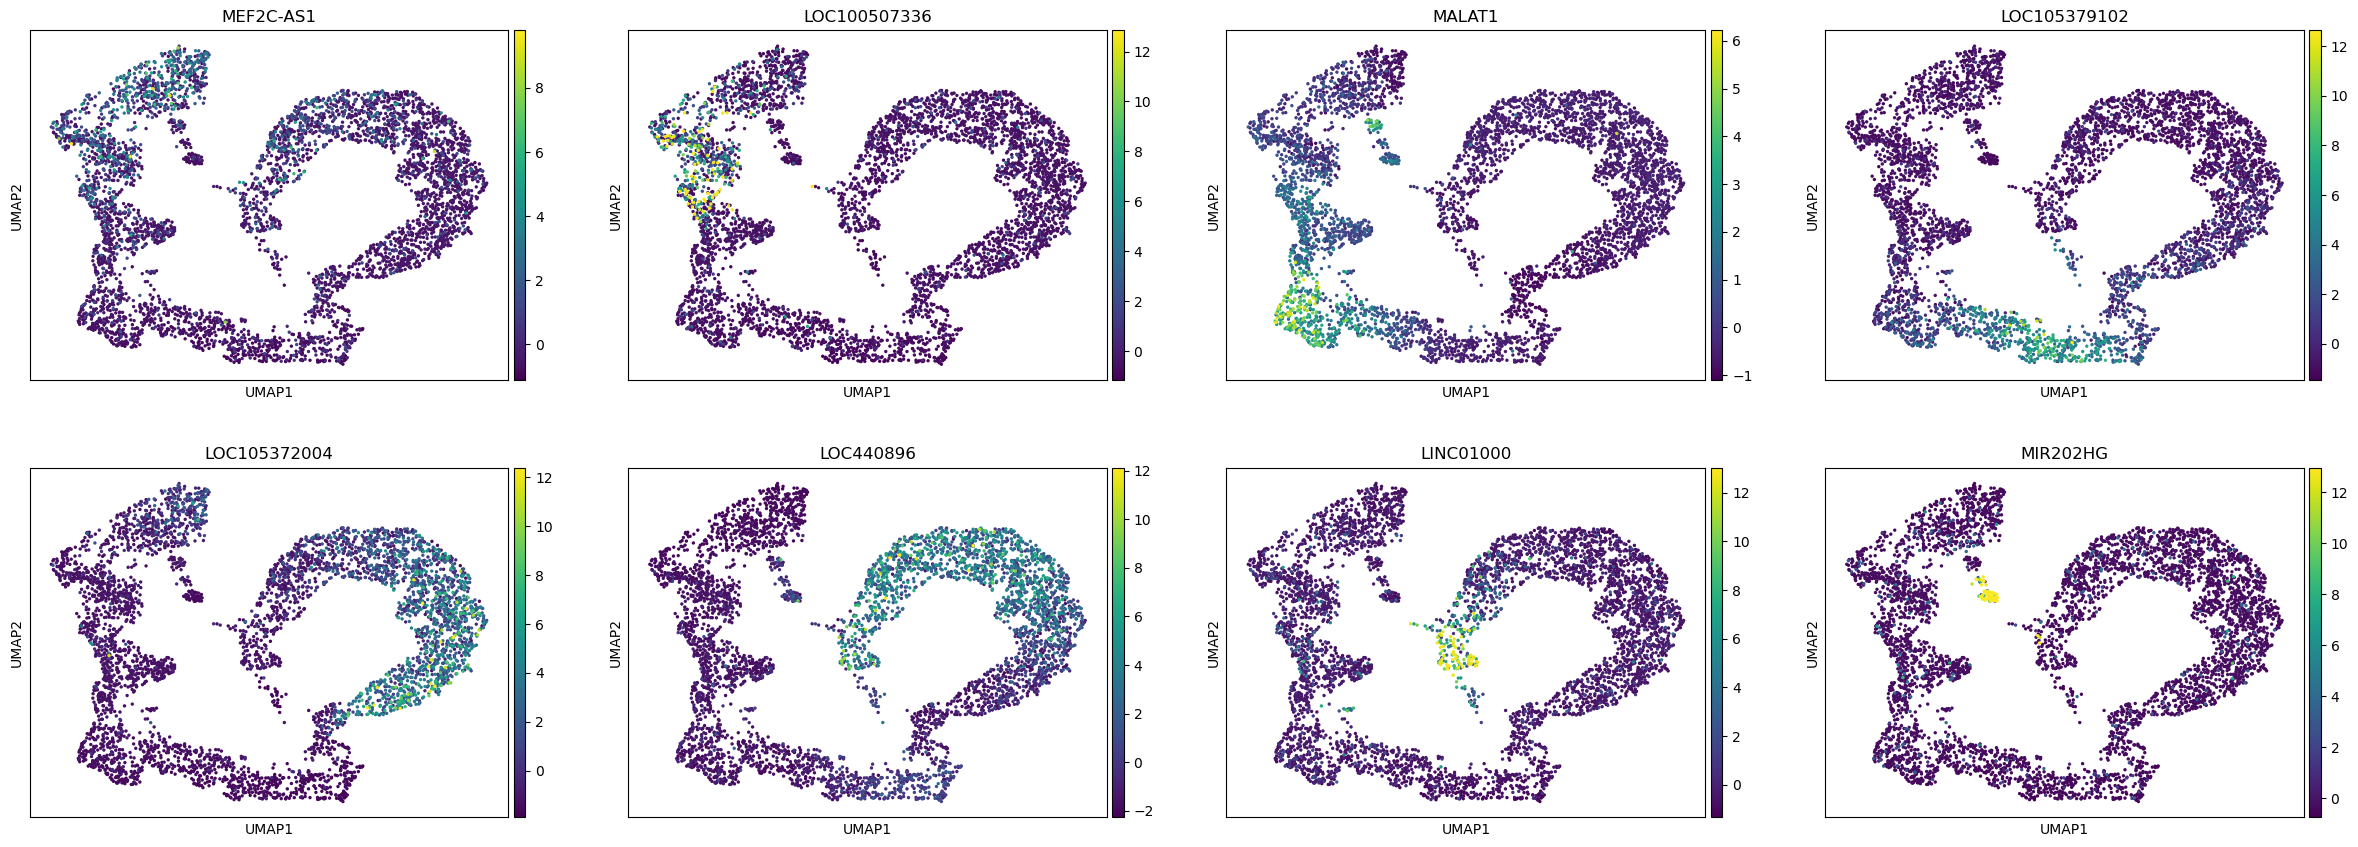

In [38]:
# raw counts
sc.plotting.umap(adata, color=['MEF2C-AS1','LOC100507336','MALAT1','LOC105379102','LOC105372004','LOC440896','LINC01000','MIR202HG'])

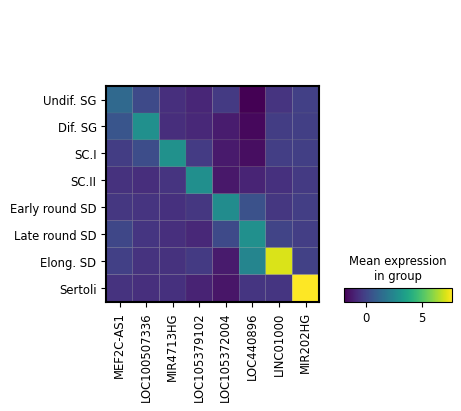

In [35]:
sc.pl.matrixplot(adata, to_plot, groupby='spermatogenesis_types', categories_order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli'])

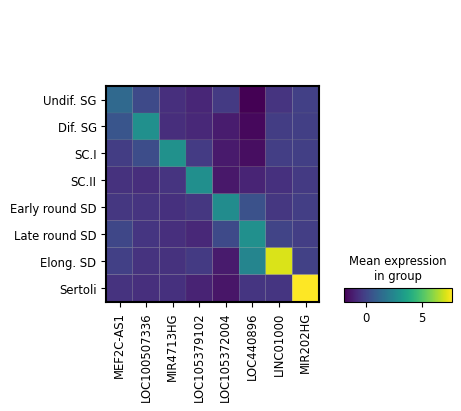

In [36]:
sc.pl.matrixplot(adata, to_plot, groupby='spermatogenesis_types', categories_order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli'])

PC1(1,72 % variance explained), PC2(0,93 % variance explained)